In [8]:
import pandas as pd
pd.set_option('display.max_columns', None) ## 모든 열을 출력한다
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings('ignore')
import wget

from casting.preprocessing import calculate_defect_rate
from casting.configuration import columns

In [9]:
# 글꼴 파일을 다운로드할 URL
# font_url = "https://github.com/google/fonts/raw/main/ofl/nanumgothic/NanumGothic-Bold.ttf"
# 글꼴 파일을 다운로드
# font_path = wget.download(font_url, out='NanumGothic-Bold.ttf')
# 다운로드한 글꼴 파일 경로를 Matplotlib에 등록
font_manager.fontManager.addfont('NanumGothic-Bold.ttf')
plt.rc('font', family='NanumGothic')

In [10]:
df_origin = pd.read_csv('casting/data/raw/casting_data_origin.csv', encoding = 'euc-kr')
df = df_origin[columns.use_columns]

# 속도 관련

### 1. low_selction_speed

In [11]:
ax110 = df[df['low_section_speed']<10]
a = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

In [12]:
ax110 = df[(df['low_section_speed']<100) & (df['low_section_speed']>=10)]
b = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

In [13]:
ax110 = df[(df['low_section_speed']>=100) & (df['low_section_speed']<=150)]
c = ax110['passorfail'].value_counts().values[1] / sum(ax110['passorfail'].value_counts().values)*100

In [14]:
ax110 = df[df['low_section_speed']>150]
d = ax110['passorfail'].value_counts().values[0] / sum(ax110['passorfail'].value_counts().values)*100

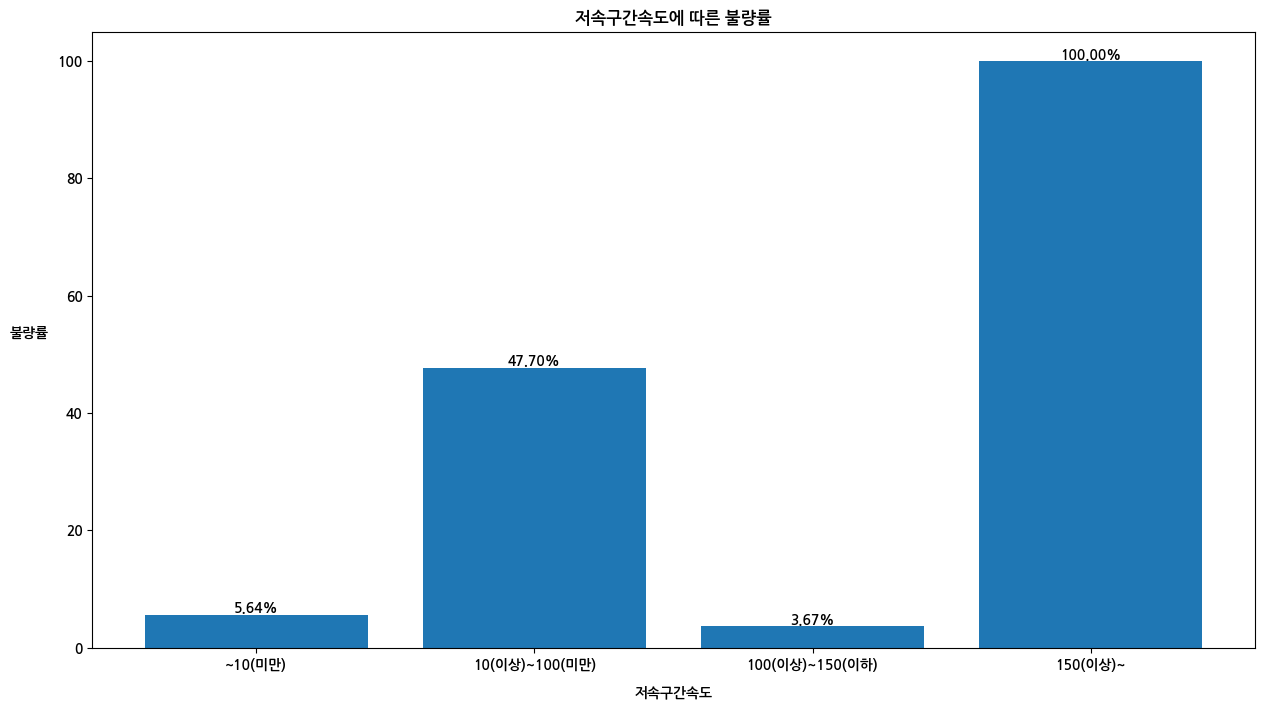

In [15]:
labels = ['~10(미만)', '10(이상)~100(미만)', '100(이상)~150(이하)', '150(이상)~']
values = [a, b, c, d]

fig = plt.figure(figsize=(15,8))

# 그래프 그리기
plt.bar(labels, values)
for i, v in enumerate(values):
    plt.text(i, v, f"{v:.2f}%", ha='center', va='bottom')

# 그래프 제목과 축 레이블 설정
plt.title('저속구간속도에 따른 불량률')
plt.xlabel('저속구간속도',labelpad=10)
plt.ylabel('불량률', labelpad=20, rotation=0)

# 그래프 보이기
plt.show()

### 2.high_selction_speed

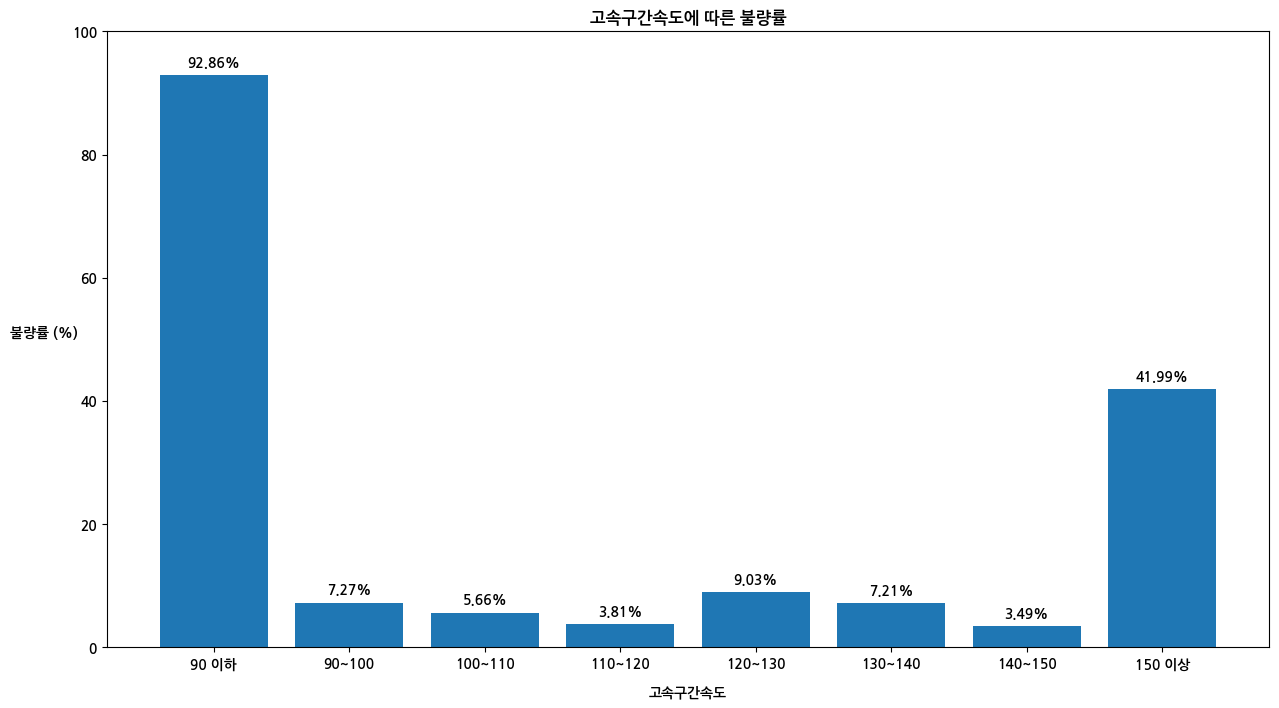

In [16]:
# 구간 설정
bins = [float('-inf'), 90, 100, 110, 120, 130, 140, 150, float('inf')]  # 90 이하와 150 이상으로 조정
labels = ['90 이하', '90~100', '100~110', '110~120', '120~130', '130~140', '140~150', '150 이상']

# 각 구간에 대한 불량률 계산
values = [calculate_defect_rate(df, bins[i], bins[i + 1], 'high_section_speed') for i in range(len(bins) - 1)]

# 그래프 그리기
fig = plt.figure(figsize=(15, 8))
plt.bar(labels, values)

# 값 표시
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')  # 막대 위에 퍼센트 표시

# 그래프 제목과 축 레이블 설정
plt.title('고속구간속도에 따른 불량률')
plt.xlabel('고속구간속도', labelpad=10)
plt.ylabel('불량률 (%)', labelpad=20, rotation=0)
plt.ylim(0, 100)

# 그래프 보이기
plt.show()

# 압력

### 1. cast_pressure

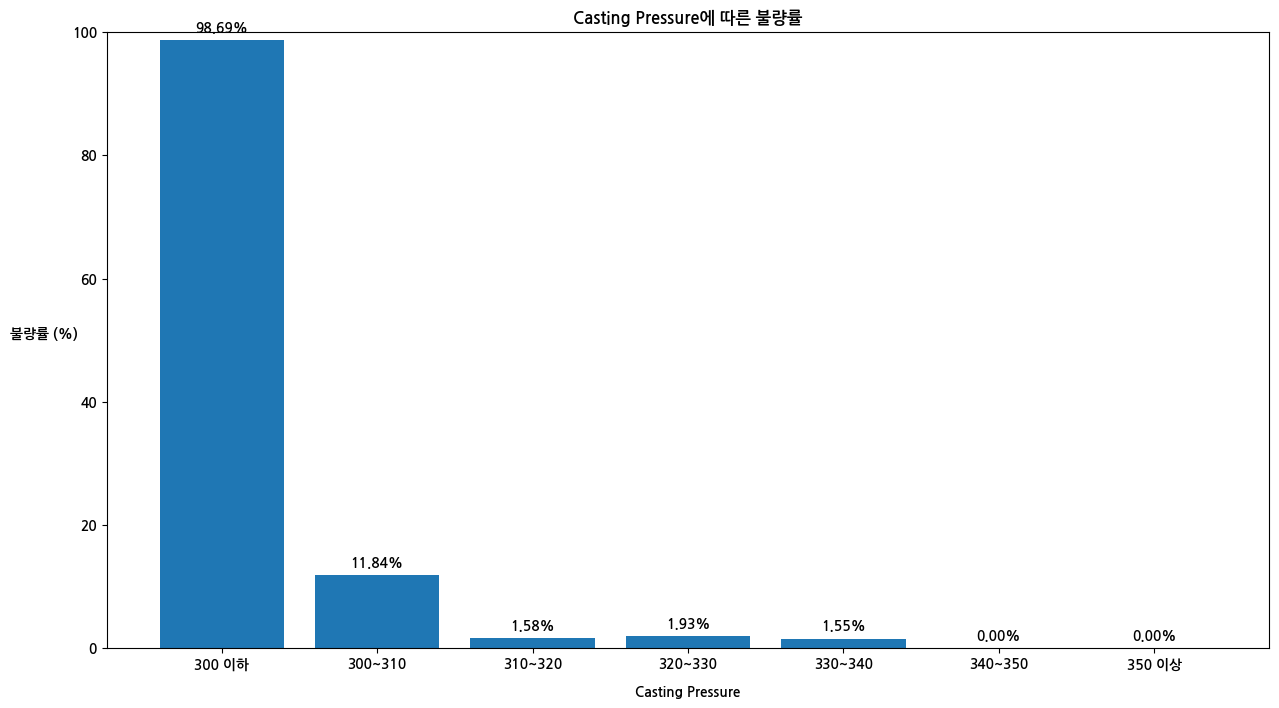

In [17]:
# 구간 설정
bins = [float('-inf'), 300, 310, 320, 330, 340, 350, float('inf')]  # 300 이상과 350 이상으로 설정
labels = ['300 이하', '300~310', '310~320', '320~330', '330~340', '340~350', '350 이상']

# 각 구간에 대한 불량률 계산
values = [calculate_defect_rate(df, bins[i], bins[i + 1], 'cast_pressure') for i in range(len(bins) - 1)]

# 그래프 그리기
fig = plt.figure(figsize=(15, 8))
plt.bar(labels, values)

# 값 표시
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')  # 막대 위에 퍼센트 표시

# 그래프 제목과 축 레이블 설정
plt.title('Casting Pressure에 따른 불량률')
plt.xlabel('Casting Pressure', labelpad=10)
plt.ylabel('불량률 (%)', labelpad=20, rotation=0)
plt.ylim(0, 100)

# 그래프 보이기
plt.show()

In [18]:
df['cast_pressure'].describe()

count    92014.000000
mean       324.554535
std         27.327683
min         41.000000
25%        329.000000
50%        330.000000
75%        331.000000
max        348.000000
Name: cast_pressure, dtype: float64

# 온도

### 1. molten_temp

In [19]:
df['molten_temp'].describe()

count    89754.000000
mean       718.618513
std         51.728659
min          0.000000
25%        713.000000
50%        728.000000
75%        730.000000
max        735.000000
Name: molten_temp, dtype: float64

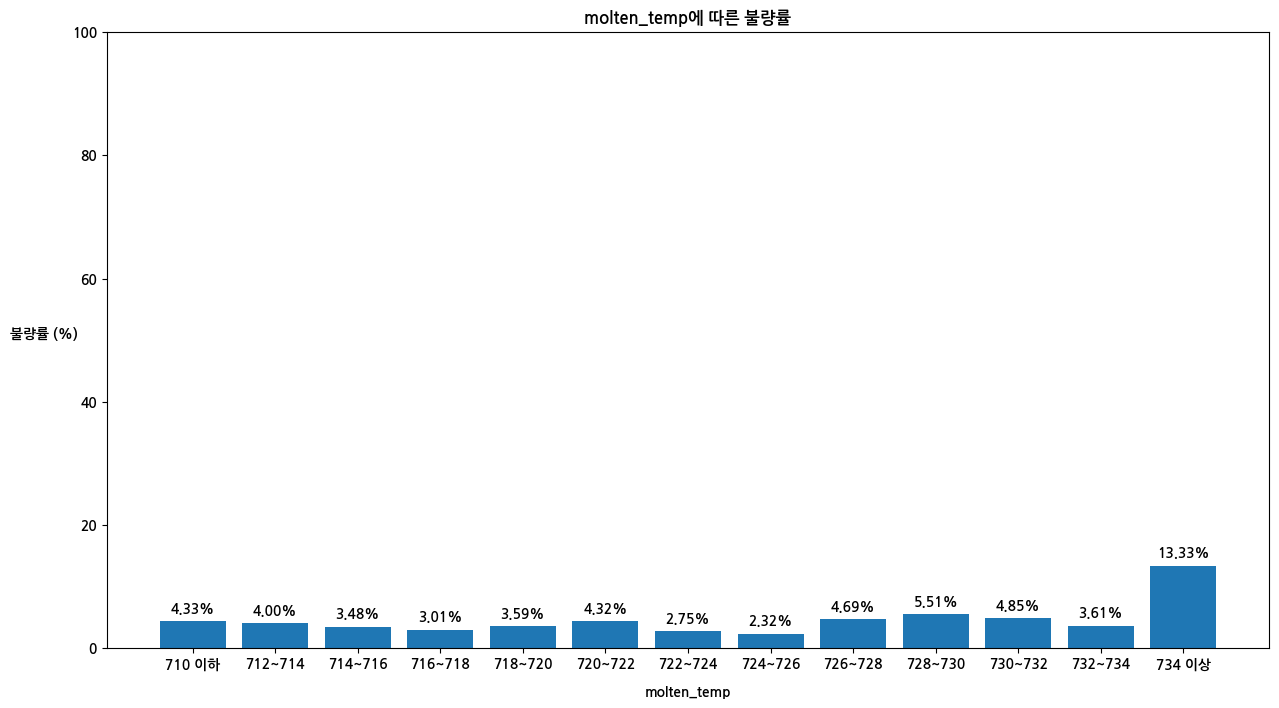

In [20]:
# 구간 설정
bins = list(range(710, 736, 2))  # 710부터 735까지 2 단위
bins.append(float('inf'))  # 마지막 구간을 무한대로 설정
labels = [f'{bins[i]}~{bins[i + 1]}' for i in range(len(bins) - 1)]  # 레이블 설정
labels[0] = '710 이하'  # 첫 번째 레이블 수정
labels[-1] = '734 이상'  # 첫 번째 레이블 수정

# 각 구간에 대한 불량률 계산
values = [calculate_defect_rate(df, bins[i], bins[i + 1], 'molten_temp') for i in range(len(bins) - 1)]

# 그래프 그리기
fig = plt.figure(figsize=(15, 8))
plt.bar(labels, values)

# 값 표시
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')  # 막대 위에 퍼센트 표시

# 그래프 제목과 축 레이블 설정
plt.title('molten_temp에 따른 불량률')
plt.xlabel('molten_temp', labelpad=10)
plt.ylabel('불량률 (%)', labelpad=20, rotation=0)
plt.ylim(0, 100)

# 그래프 보이기
plt.show()

# 카테고리 데이터 선정

# 이상치 관련 - 주요변수만

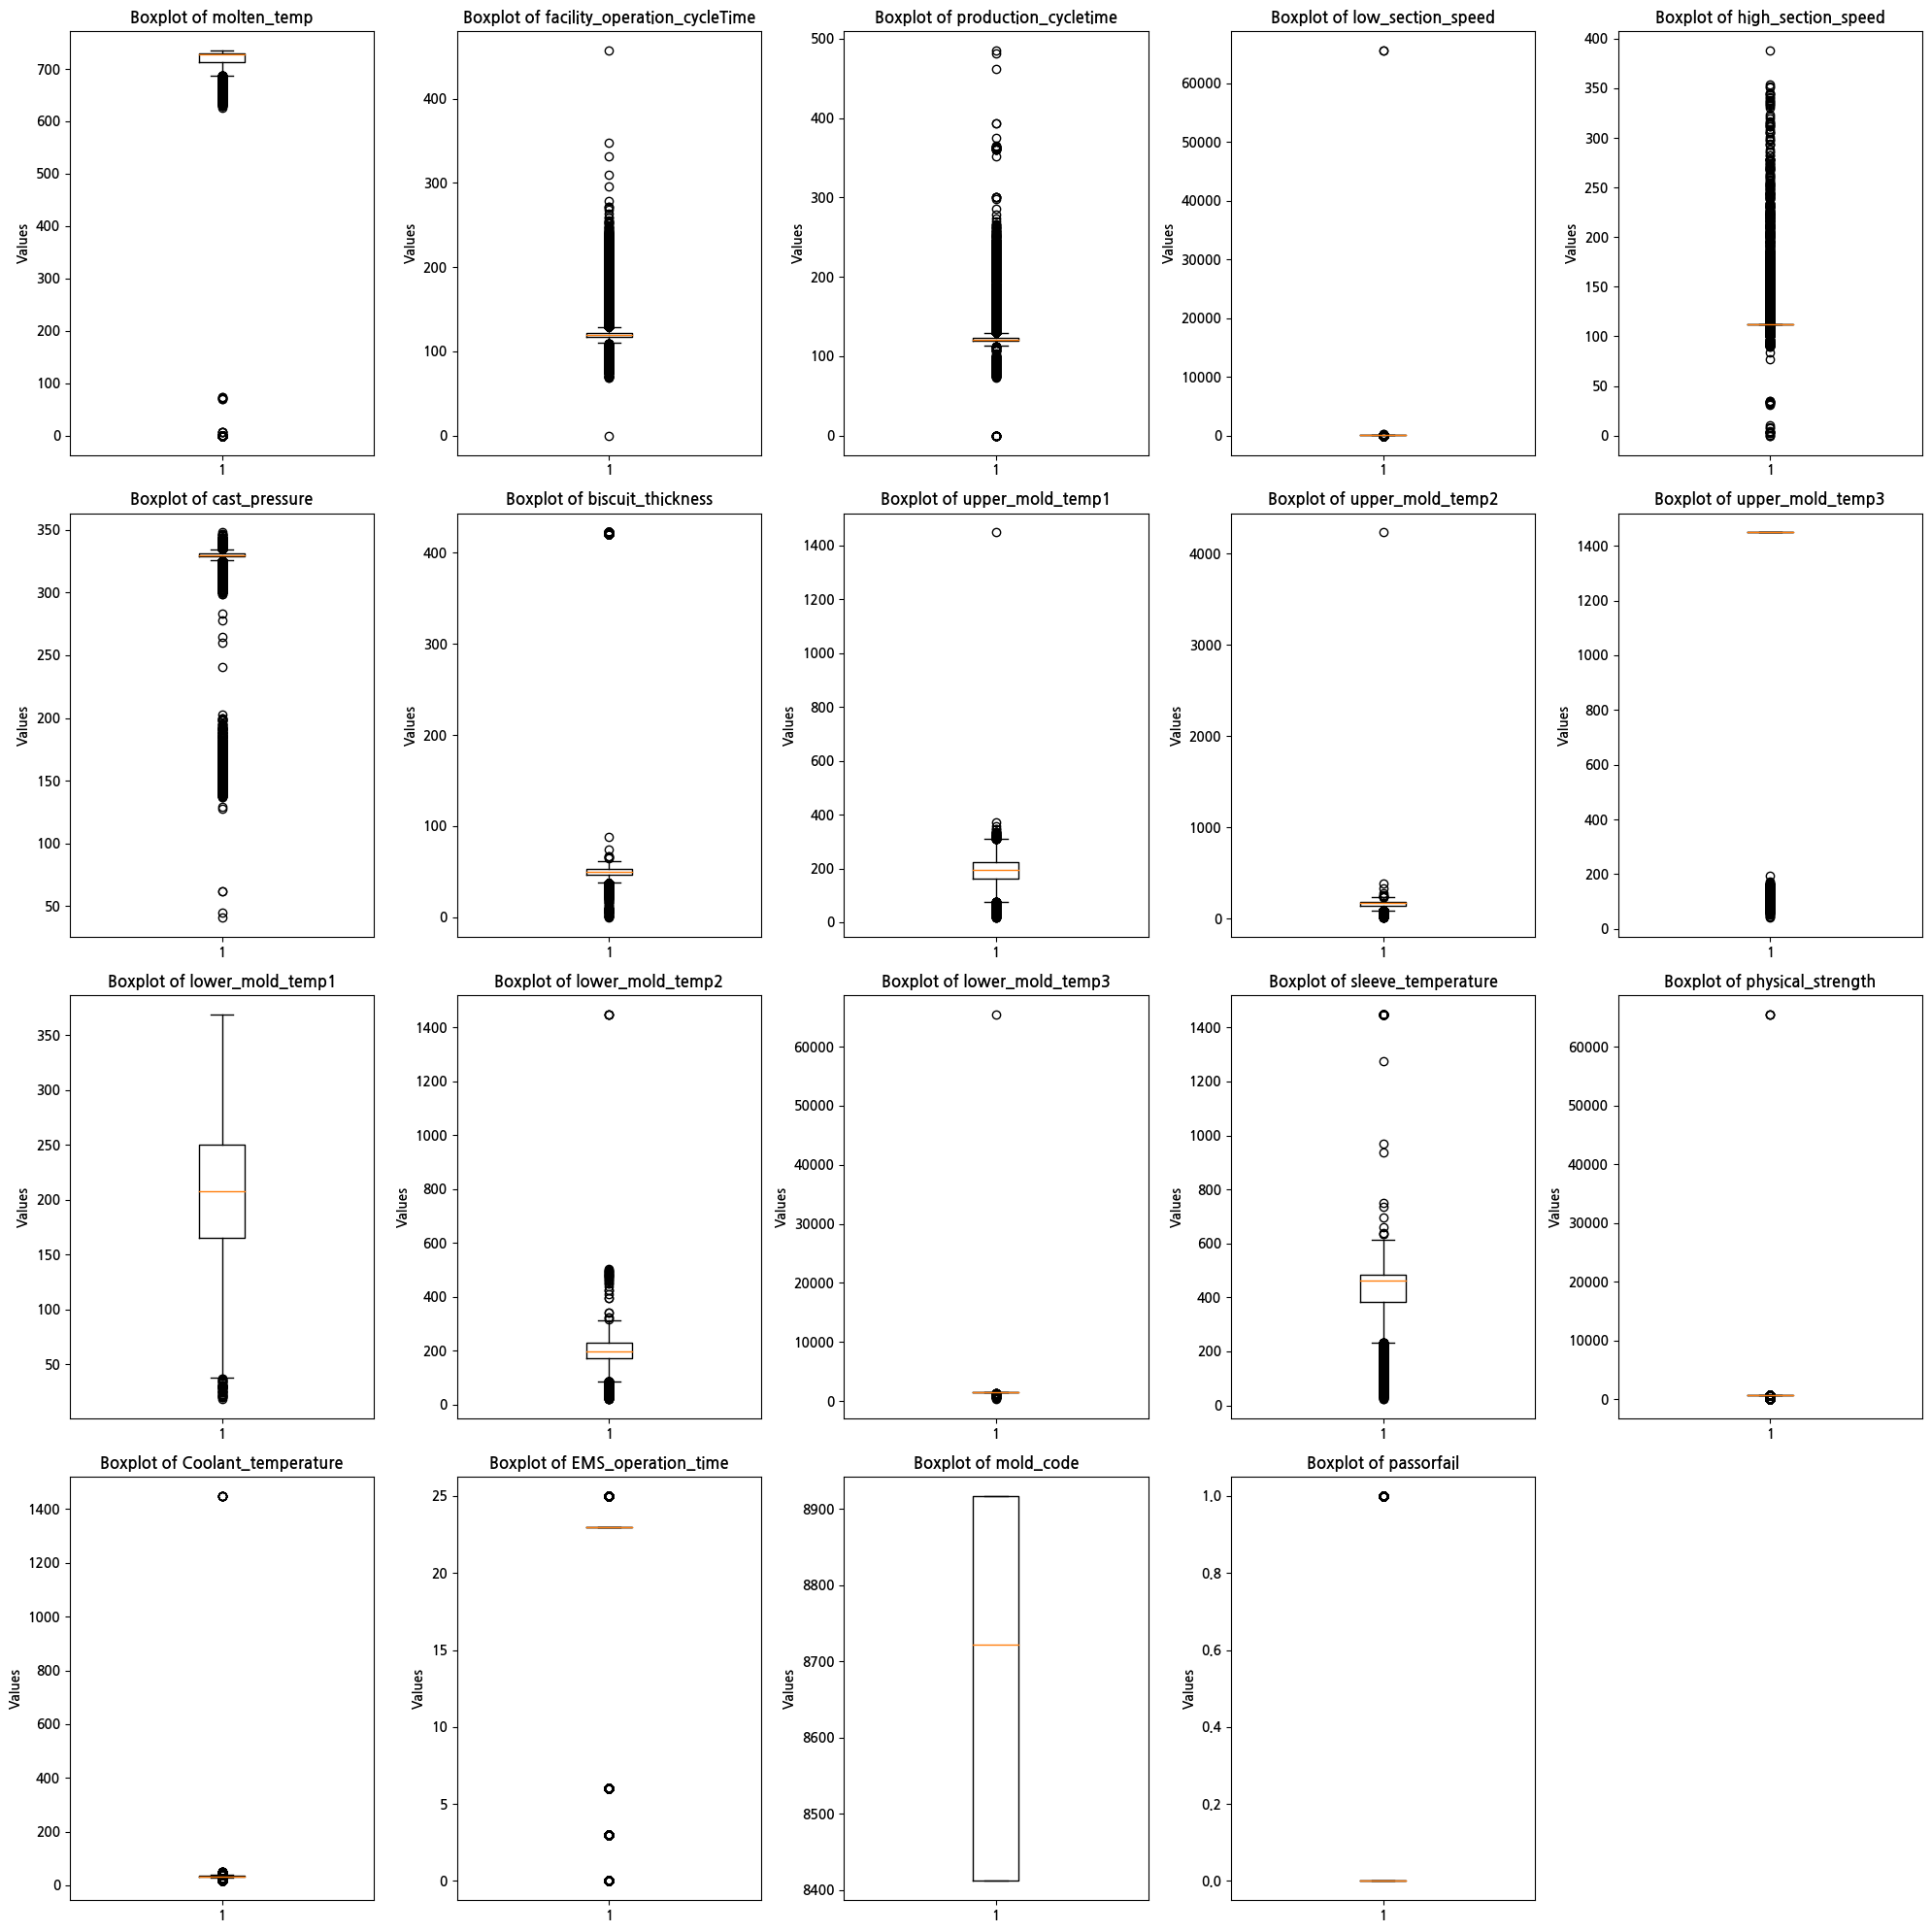

In [ ]:
import matplotlib.pyplot as plt
import math

# Select only numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=['float64', 'int64'])


# Set up the grid dimensions: 3 columns and as many rows as needed
num_columns = 5
num_plots = len(numeric_cols.columns)
num_rows = math.ceil(num_plots / num_columns)

# Create the subplots with a grid
plt.figure(figsize=(20, 5 * num_rows))

for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(num_rows, num_columns, i)
    plt.boxplot(numeric_cols[col].dropna())  # Drop NaN values to avoid errors
    plt.title(f"Boxplot of {col}")
    plt.ylabel("Values")

plt.tight_layout()
plt.show()

# 데이터 분포 확인

In [80]:
train = pd.read_csv('casting/data/processed_data/train.csv')
valid = pd.read_csv('casting/data/processed_data/valid.csv')
test = pd.read_csv('casting/data/processed_data/test.csv')

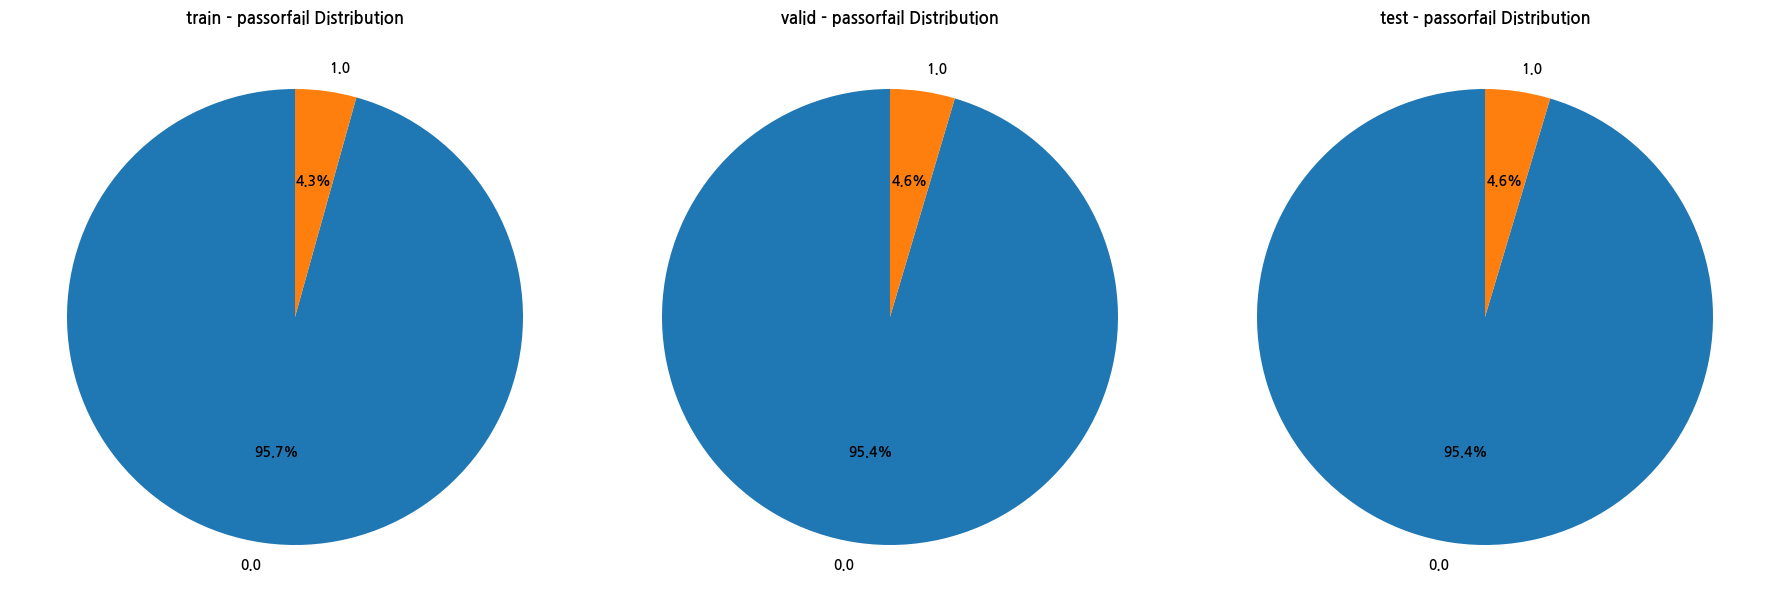

In [83]:
dist1 = train['passorfail'].value_counts()
dist2 = valid['passorfail'].value_counts()
dist3 = test['passorfail'].value_counts()

# Plot pie charts for each dataset
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Dataset 1
axes[0].pie(dist1, labels=dist1.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title("train - passorfail Distribution")

# Dataset 2
axes[1].pie(dist2, labels=dist2.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("valid - passorfail Distribution")

# Dataset 3
axes[2].pie(dist3, labels=dist3.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title("test - passorfail Distribution")

plt.tight_layout()
plt.show()